# Exploratory Data Analysis

# 1.1 Introduction
<br>
After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.
<br>
When working with numerical data, some of the exploratory data analysis (EDA) techniquess we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The ideas is the same when working with text data. We are going to find some more obviious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each personality type:
<br>
  1. Most common words - find these and create word clouds
  2. Size of vocabulary - look number of unique words and also how quickly someone speaks
  3. Amount of narcissism - most about me terms

# 1.2 Most Common Words

### 1.2.1 Analysis

In [1]:
import pandas as pd
# Read in the document-term matrix
data = pd.read_pickle('xdata.pkl')
data = data.transpose()
data = data.groupby(level=0, axis=1).sum()
data.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
ability,37,94,35,96,7,3,0,14,206,246,176,245,20,31,29,54
able,86,291,113,270,14,18,18,36,799,822,480,526,68,85,84,143
absolute,9,36,10,48,0,2,0,3,84,101,50,86,6,3,8,15
absolutely,54,166,57,174,12,6,9,15,400,461,214,284,50,47,60,88
abstract,7,27,17,45,0,2,1,6,95,97,59,114,7,16,6,21


In [2]:
data.index.name = 'tokens'
data

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
tokens,,,,,,,,,,,,,,,,
ability,37,94,35,96,7,3,0,14,206,246,176,245,20,31,29,54
able,86,291,113,270,14,18,18,36,799,822,480,526,68,85,84,143
absolute,9,36,10,48,0,2,0,3,84,101,50,86,6,3,8,15
absolutely,54,166,57,174,12,6,9,15,400,461,214,284,50,47,60,88
abstract,7,27,17,45,0,2,1,6,95,97,59,114,7,16,6,21
accept,22,78,28,91,7,5,6,14,205,267,136,159,15,27,30,33
according,13,57,21,65,2,5,2,7,129,121,96,115,12,16,25,22
account,14,58,9,52,1,1,6,5,98,125,100,102,9,17,20,28
accurate,33,77,40,104,9,10,7,11,211,222,178,174,22,38,21,48


In [3]:
# Find the top 500 words said by each personality type
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(500)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{'ENFJ': [('im', 1660),
  ('enfjs', 331),
  ('fe', 157),
  ('feelings', 155),
  ('happy', 153),
  ('thanks', 150),
  ('sorry', 142),
  ('care', 137),
  ('especially', 129),
  ('guy', 128),
  ('true', 128),
  ('experience', 127),
  ('almost', 127),
  ('hope', 125),
  ('wrong', 124),
  ('sounds', 124),
  ('ask', 123),
  ('close', 123),
  ('stuff', 119),
  ('however', 118),
  ('far', 117),
  ('strong', 115),
  ('let', 115),
  ('theyre', 114),
  ('put', 113),
  ('shes', 113),
  ('high', 112),
  ('told', 109),
  ('year', 108),
  ('haha', 108),
  ('wanted', 107),
  ('music', 107),
  ('comes', 107),
  ('away', 105),
  ('nothing', 103),
  ('found', 103),
  ('head', 101),
  ('forum', 101),
  ('start', 101),
  ('totally', 101),
  ('making', 101),
  ('either', 100),
  ('test', 100),
  ('without', 100),
  ('relate', 100),
  ('enjoy', 99),
  ('using', 98),
  ('rather', 98),
  ('wouldnt', 97),
  ('exactly', 97),
  ('reading', 95),
  ('big', 95),
  ('infps', 94),
  ('reason', 94),
  ('today', 94),
  

In [4]:
del data.index.name

In [5]:
# print the top 200 words said by each personality type
for Personality_type, top_words in top_dict.items():
    print(Personality_type)
    print(', '.join([str(word) for word, count in top_words[0:200]]))
    print('_ _ _')

ENFJ
im, enfjs, fe, feelings, happy, thanks, sorry, care, especially, guy, true, experience, almost, hope, wrong, sounds, ask, close, stuff, however, far, strong, let, theyre, put, shes, high, told, year, haha, wanted, music, comes, away, nothing, found, head, forum, start, totally, making, either, test, without, relate, enjoy, using, rather, wouldnt, exactly, reading, big, infps, reason, today, fact, real, completely, problem, girl, remember, social, wish, change, welcome, looking, interested, ni, past, along, whole, able, situation, emotions, old, figure, similar, done, show, song, advice, havent, functions, important, felt, already, met, alone, saying, yet, personal, seen, emotional, end, family, place, yeah, book, ago, hear, share, become, open, example, live, sort, man, fi, oh, together, awesome, relationships, sent, thoughts, ones, words, personally, arent, stop, mostly, matter, certain, job, crazy, wont, wasnt, feels, went, answer, general, took, favorite, although, honestly, mo

#### NOTE: 
At this point, we could go on and create word clouds. However, looking at these top words, you can see that some of them have little meaning and could be added to a stop words list, so let's do just that.  

In [6]:
# Look at the most commom top words __> add them to the stop word list
from collections import Counter

# Let's first pull out the top 500 words for each Personality type
words = []
for Personality_type in data.columns:
    top = [word for(word, count) in top_dict[Personality_type][:500]]
    for t in top:
        words.append(t)
words

['im',
 'enfjs',
 'fe',
 'feelings',
 'happy',
 'thanks',
 'sorry',
 'care',
 'especially',
 'guy',
 'true',
 'experience',
 'almost',
 'hope',
 'wrong',
 'sounds',
 'ask',
 'close',
 'stuff',
 'however',
 'far',
 'strong',
 'let',
 'theyre',
 'put',
 'shes',
 'high',
 'told',
 'year',
 'haha',
 'wanted',
 'music',
 'comes',
 'away',
 'nothing',
 'found',
 'head',
 'forum',
 'start',
 'totally',
 'making',
 'either',
 'test',
 'without',
 'relate',
 'enjoy',
 'using',
 'rather',
 'wouldnt',
 'exactly',
 'reading',
 'big',
 'infps',
 'reason',
 'today',
 'fact',
 'real',
 'completely',
 'problem',
 'girl',
 'remember',
 'social',
 'wish',
 'change',
 'welcome',
 'looking',
 'interested',
 'ni',
 'past',
 'along',
 'whole',
 'able',
 'situation',
 'emotions',
 'old',
 'figure',
 'similar',
 'done',
 'show',
 'song',
 'advice',
 'havent',
 'functions',
 'important',
 'felt',
 'already',
 'met',
 'alone',
 'saying',
 'yet',
 'personal',
 'seen',
 'emotional',
 'end',
 'family',
 'place',
 

In [7]:
# Let's aggregate this list and identify the most common words along with how many times they occur in
Counter(words).most_common()

[('im', 16),
 ('fe', 16),
 ('feelings', 16),
 ('happy', 16),
 ('thanks', 16),
 ('sorry', 16),
 ('care', 16),
 ('especially', 16),
 ('guy', 16),
 ('true', 16),
 ('experience', 16),
 ('almost', 16),
 ('hope', 16),
 ('wrong', 16),
 ('sounds', 16),
 ('ask', 16),
 ('close', 16),
 ('stuff', 16),
 ('however', 16),
 ('far', 16),
 ('strong', 16),
 ('let', 16),
 ('theyre', 16),
 ('put', 16),
 ('shes', 16),
 ('high', 16),
 ('told', 16),
 ('year', 16),
 ('wanted', 16),
 ('music', 16),
 ('comes', 16),
 ('away', 16),
 ('nothing', 16),
 ('found', 16),
 ('head', 16),
 ('forum', 16),
 ('start', 16),
 ('totally', 16),
 ('making', 16),
 ('either', 16),
 ('test', 16),
 ('without', 16),
 ('relate', 16),
 ('enjoy', 16),
 ('using', 16),
 ('rather', 16),
 ('wouldnt', 16),
 ('exactly', 16),
 ('reading', 16),
 ('big', 16),
 ('reason', 16),
 ('fact', 16),
 ('real', 16),
 ('completely', 16),
 ('problem', 16),
 ('girl', 16),
 ('remember', 16),
 ('social', 16),
 ('wish', 16),
 ('change', 16),
 ('welcome', 16),
 ('l

In [8]:
# if more than half of the personality types have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
add_stop_words

['im',
 'fe',
 'feelings',
 'happy',
 'thanks',
 'sorry',
 'care',
 'especially',
 'guy',
 'true',
 'experience',
 'almost',
 'hope',
 'wrong',
 'sounds',
 'ask',
 'close',
 'stuff',
 'however',
 'far',
 'strong',
 'let',
 'theyre',
 'put',
 'shes',
 'high',
 'told',
 'year',
 'wanted',
 'music',
 'comes',
 'away',
 'nothing',
 'found',
 'head',
 'forum',
 'start',
 'totally',
 'making',
 'either',
 'test',
 'without',
 'relate',
 'enjoy',
 'using',
 'rather',
 'wouldnt',
 'exactly',
 'reading',
 'big',
 'reason',
 'fact',
 'real',
 'completely',
 'problem',
 'girl',
 'remember',
 'social',
 'wish',
 'change',
 'welcome',
 'looking',
 'interested',
 'ni',
 'past',
 'along',
 'whole',
 'able',
 'situation',
 'emotions',
 'old',
 'figure',
 'similar',
 'done',
 'show',
 'advice',
 'havent',
 'functions',
 'important',
 'felt',
 'already',
 'met',
 'alone',
 'saying',
 'yet',
 'seen',
 'emotional',
 'end',
 'family',
 'place',
 'book',
 'ago',
 'hear',
 'open',
 'example',
 'live',
 'sort

In [9]:
# Let's update our documnet-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_cleaning.pkl')

# Add new stop words
#stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
add_stop_words = extra_stop_words = ['im','like', 'think', 'people', 'dont', 'know', 'really', 'would', 'one', 'get',
 'feel', 'love', 'time', 'ive', 'much', 'say', 'something', 'good', 'start', 'girl',
 'things', 'want', 'see', 'way', 'someone', 'also', 'well', 'friends',
 'always', 'type', 'lot', 'could', 'make', 'go', 'thing', 'even', 'person', 'need',
 'find', 'right', 'never', 'youre', 'thats', 'going', 'life', 'friend',
 'pretty', 'though', 'sure', 'said', 'cant', 'first', 'actually', 'still', 'best', 'many', 'take', 'others', 'work', 'read', 'sometimes', 'got',
 'around', 'thought', 'try', 'back', 'makes', 'better', 'trying', 'didnt', 'agree', 'kind', 'mean', 'tell', 'post', 'two', 'probably', 'talk',
 'anything', 'since', 'maybe', 'understand', 'seems', 'ill', 'id', 'little', 'doesnt', 'thread', 'new', 'long', 'ever', 'years', 'hard', 'might',
 'types', 'us', 'everyone','different', 'look', 'usually', 'may', 'day', 'give', 'come', 'personality', 'guess', 'mind', 'relationship', 'bit', 'quite',
 'great', 'made', 'thinking', 'everything', 'school', 'seem', 'bad', 'every',
 'help', 'yes', 'definitely', 'believe', 'point', 'used', 'infp', 'guys', 'tend','hes', 'use', 'intj', 
 'often', 'getting', 'interesting', 'last', 'talking', 'infj', 'times', 'another', 'mbti', 'enfp', 'world','question','part', 'theres',
 'feeling', 'fun', 'intp', 'enough', 'isnt', 'else', 'hate', 'lol', 'keep',
 'anyone', 'nice', 'idea', 'sense','least','enfj', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
 'isfj', 'isfp', 'istj', 'istp','sound','thank','enfjs', 'entjs', 'entps', 'esfjs', 'esfps', 'estjs', 'estps',
 'isfjs', 'isfps', 'istjs', 'istps','infjs','infps','intjs','enfps','intps','isnts', 'let', 'problem','im', 'fe',
 'feelings', 'happy', 'thanks', 'sorry', 'care', 'especially', 'guy', 'true', 'experience', 'almost',
 'hope', 'wrong', 'sounds', 'ask', 'close', 'stuff', 'however', 'far', 'strong', 'let', 'theyre', 'put', 'shes',
 'high', 'told', 'year', 'wanted', 'music', 'comes', 'away', 'nothing', 'found', 'head', 'forum', 'start', 'totally',
 'making', 'either', 'test', 'without', 'relate', 'enjoy', 'using', 'rather', 'wouldnt', 'exactly', 'reading', 'big',
 'reason', 'fact', 'real', 'completely', 'problem', 'girl', 'remember', 'social', 'wish', 'change', 'welcome', 'looking',
 'interested', 'ni', 'past', 'along', 'whole', 'able', 'situation', 'emotions', 'old', 'figure', 'similar', 'done', 'show',
 'advice', 'havent', 'functions', 'important', 'felt', 'already', 'met', 'alone', 'saying', 'yet', 'seen', 'emotional', 'end',
 'family', 'place', 'book', 'ago', 'hear', 'open', 'example', 'live', 'sort', 'man', 'fi', 'oh', 'together', 'awesome', 'relationships',
 'ones', 'words', 'personally', 'arent', 'stop', 'mostly', 'matter', 'certain', 'job', 'crazy', 'wont', 'wasnt', 'answer', 'general',
 'took', 'although', 'honestly', 'gets', 'meet', 'months', 'means', 'group', 'working', 'started', 'recently', 'needs', 'course',
 'mom', 'days', 'conversation', 'less', 'based', 'questions', 'dad', 'easy', 'taking', 'interest', 'funny', 'saw', 'weird', 'depends',
 'posts', 'cool', 'mine', 'case', 'enneagram', 'extremely', 'goes', 'honest', 'hurt', 'youve', 'ne', 'night', 'next', 'consider', 'opinion',
 'whatever', 'absolutely', 'home', 'learn', 'explain', 'topic', 'prefer', 'play', 'appreciate', 'name', 'heard', 'must', 'seriously', 'self', 
 'likely', 'function', 'tried', 'couple', 'easily', 'wants', 'generally', 'week', 'known', 'ok', 'asking', 'trust', 'list', 'eyes', 'taken',
 'common', 'second', 'unless', 'posted', 'speak', 'write', 'instead', 'stay', 'meant', 'attention', 'ways', 'free', 'whether', 'college', 
 'female', 'seeing', 'says', 'parents', 'writing', 'fine', 'half', 'si', 'stand', 'god', 'watch', 'haha', 'today', 'personal', 'yeah', 'share',
 'become', 'thoughts', 'feels', 'went', 'favorite', 'side', 'kinda', 'curious', 'whats', 'deep', 'towards', 'please', 'video', 'asked',
 'possible', 'takes', 'act', 'problems', 'deal', 'etc', 'se', 'male', 'call', 'knew', 'wonder', 'women', 'dating', 'happens', 'face', 'intjs',
 'lets', 'works', 'story', 'perfect', 'anyway', 'realize', 'move', 'coming', 'introverted', 'word', 'mother', 'okay', 'movie', 'currently',
 'add', 'leave', 'happen', 'ideas', 'listen', 'noticed', 'came', 'game', 'called', 'picture', 'looks', 'stupid', 'understanding', 'issue',
 'level', 'issues', 'girls', 'liked', 'future', 'house', 'watching', 'money', 'spend', 'notice', 'three', 'class', 'short', 'view', 'cognitive',
 'te', 'order', 'sent', 'moment', 'difficult', 'left', 'sex', 'information', 'lots', 'cause', 'basically', 'fit', 'couldnt', 'ii',
 'happened', 'except', 'response', 'reasons', 'full', 'playing', 'brother', 'learning', 'late', 'child', 'books', 'decided', 'thei', 'imagine',
 'art', 'small', 'huge', 'wait', 'sleep', 'single', 'kids', 'description', 'top' 'song', 'heart', 'infjs', 'hell', 'sad', 'super',
 'human', 'giving', 'wondering', 'value', 'serious', 'youll', 'simply', 'clear', 'break', 'lost', 'learned', 'age', 'typing', 'sister',
 'hand', 'random', 'body', 'run', 'internet', 'living', 'character', 'due', 'hours', 'given', 'difference', 'online', 'telling', 'mentioned',
 'set', 'room', 'constantly', 'games', 'later', 'glad', 'control', 'perhaps','angry', 'ti', 'loved', 'gonna', 'men', 'fear', 'turn',
 'young', 'laugh', 'fall', 'food', 'perc', 'pick', 'confused', 'certainly', 'younger', 'normal', 'outside', 'across', 'physical', 'several',
 'simple', 'infps', 'energy', 'truly', 'intps', 'woman', 'older', 'toi', 'knows', 'aware', 'date', 'lack', 'suppose', 'choose', 'plan',
 'laughing', 'shit', 'kid', 'language', 'theory', 'eat', 'truth', 'gave', 'check', 'cannot', 'tests', 'amazing', 'peoples', 'boyfriend', 'focus',
 'comfortable', 'heres', 'hold','finding', 'respect', 'inside', 'movies', 'hair', 'bored', 'brain', 'situations', 'doubt', 'dominant', 'main',
 'worth', 'state', 'number', 'xd', 'bring', 'reply', 'characters', 'meaning', 'knowing', 'likes', 'nature', 'enfps', 'extroverted',
 'opposite', 'results', 'specific', 'worry', 'afraid', 'black', 'somewhere', 'behind', 'phone', 'process', 'romantic', 'shy', 'quiet','listening',
'power', 'accurate', 'negative', 'cold', 'entps','song','nf','nt','term','introvert','sj','dream', 'ex',
 'realized', 'finally', 'weeks', 'early','particular', 'annoying', 'boring', 'describe', 'vs', 'system', 'points', 'rest', 'english', 'avoid']


#Recreate document-term matrix
cv = CountVectorizer(max_features=1500, min_df=1, max_df=1.0, stop_words=add_stop_words)
data_cv = cv.fit_transform(data_clean.posts)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index
del data_stop.index.name
data_stop

# pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("data_post_stop.pkl")

In [10]:
data_stop = data_stop.transpose()

In [11]:
data_stop = data_stop.groupby(level=0, axis=1).sum()
data_stop

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
ability,37,94,35,96,7,3,0,14,206,246,176,245,20,31,29,54
absolute,9,36,10,48,0,2,0,3,84,101,50,86,6,3,8,15
abstract,7,27,17,45,0,2,1,6,95,97,59,114,7,16,6,21
accept,22,78,28,91,7,5,6,14,205,267,136,159,15,27,30,33
accepted,4,28,7,26,0,4,3,4,64,99,42,56,9,9,11,13
accepting,10,23,7,19,0,1,2,3,85,88,34,39,5,10,10,13
according,13,57,21,65,2,5,2,7,129,121,96,115,12,16,25,22
account,14,58,9,52,1,1,6,5,98,125,100,102,9,17,20,28
achieve,8,23,19,32,2,3,2,2,78,70,65,55,5,6,11,15
acting,11,58,20,55,4,3,3,6,122,142,89,105,16,22,19,20


In [12]:
# Let's make some words clouds:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt

# ADD STOP WORDS
extra_stop_words = ['im','like', 'think', 'people', 'dont', 'know', 'really', 'would', 'one', 'get',
 'feel', 'love', 'time', 'ive', 'much', 'say', 'something', 'good', 'start', 'girl',
 'things', 'want', 'see', 'way', 'someone', 'also', 'well', 'friends',
 'always', 'type', 'lot', 'could', 'make', 'go', 'thing', 'even', 'person', 'need',
 'find', 'right', 'never', 'youre', 'thats', 'going', 'life', 'friend',
 'pretty', 'though', 'sure', 'said', 'cant', 'first', 'actually', 'still', 'best', 'many', 'take', 'others', 'work', 'read', 'sometimes', 'got',
 'around', 'thought', 'try', 'back', 'makes', 'better', 'trying', 'didnt', 'agree', 'kind', 'mean', 'tell', 'post', 'two', 'probably', 'talk',
 'anything', 'since', 'maybe', 'understand', 'seems', 'ill', 'id', 'little', 'doesnt', 'thread', 'new', 'long', 'ever', 'years', 'hard', 'might',
 'types', 'us', 'everyone','different', 'look', 'usually', 'may', 'day', 'give', 'come', 'personality', 'guess', 'mind', 'relationship', 'bit', 'quite',
 'great', 'made', 'thinking', 'everything', 'school', 'seem', 'bad', 'every',
 'help', 'yes', 'definitely', 'believe', 'point', 'used', 'infp', 'guys', 'tend','hes', 'use', 'intj', 
 'often', 'getting', 'interesting', 'last', 'talking', 'infj', 'times', 'another', 'mbti', 'enfp', 'world','question','part', 'theres',
 'feeling', 'fun', 'intp', 'enough', 'isnt', 'else', 'hate', 'lol', 'keep',
 'anyone', 'nice', 'idea', 'sense','least','enfj', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
 'isfj', 'isfp', 'istj', 'istp','sound','thank','enfjs', 'entjs', 'entps', 'esfjs', 'esfps', 'estjs', 'estps',
 'isfjs', 'isfps', 'istjs', 'istps','infjs','infps','intjs','enfps','intps','isnts', 'let', 'problem','im', 'fe',
 'feelings', 'happy', 'thanks', 'sorry', 'care', 'especially', 'guy', 'true', 'experience', 'almost',
 'hope', 'wrong', 'sounds', 'ask', 'close', 'stuff', 'however', 'far', 'strong', 'let', 'theyre', 'put', 'shes',
 'high', 'told', 'year', 'wanted', 'music', 'comes', 'away', 'nothing', 'found', 'head', 'forum', 'start', 'totally',
 'making', 'either', 'test', 'without', 'relate', 'enjoy', 'using', 'rather', 'wouldnt', 'exactly', 'reading', 'big',
 'reason', 'fact', 'real', 'completely', 'problem', 'girl', 'remember', 'social', 'wish', 'change', 'welcome', 'looking',
 'interested', 'ni', 'past', 'along', 'whole', 'able', 'situation', 'emotions', 'old', 'figure', 'similar', 'done', 'show',
 'advice', 'havent', 'functions', 'important', 'felt', 'already', 'met', 'alone', 'saying', 'yet', 'seen', 'emotional', 'end',
 'family', 'place', 'book', 'ago', 'hear', 'open', 'example', 'live', 'sort', 'man', 'fi', 'oh', 'together', 'awesome', 'relationships',
 'ones', 'words', 'personally', 'arent', 'stop', 'mostly', 'matter', 'certain', 'job', 'crazy', 'wont', 'wasnt', 'answer', 'general',
 'took', 'although', 'honestly', 'gets', 'meet', 'months', 'means', 'group', 'working', 'started', 'recently', 'needs', 'course',
 'mom', 'days', 'conversation', 'less', 'based', 'questions', 'dad', 'easy', 'taking', 'interest', 'funny', 'saw', 'weird', 'depends',
 'posts', 'cool', 'mine', 'case', 'enneagram', 'extremely', 'goes', 'honest', 'hurt', 'youve', 'ne', 'night', 'next', 'consider', 'opinion',
 'whatever', 'absolutely', 'home', 'learn', 'explain', 'topic', 'prefer', 'play', 'appreciate', 'name', 'heard', 'must', 'seriously', 'self', 
 'likely', 'function', 'tried', 'couple', 'easily', 'wants', 'generally', 'week', 'known', 'ok', 'asking', 'trust', 'list', 'eyes', 'taken',
 'common', 'second', 'unless', 'posted', 'speak', 'write', 'instead', 'stay', 'meant', 'attention', 'ways', 'free', 'whether', 'college', 
 'female', 'seeing', 'says', 'parents', 'writing', 'fine', 'half', 'si', 'stand', 'god', 'watch', 'haha', 'today', 'personal', 'yeah', 'share',
 'become', 'thoughts', 'feels', 'went', 'favorite', 'side', 'kinda', 'curious', 'whats', 'deep', 'towards', 'please', 'video', 'asked',
 'possible', 'takes', 'act', 'problems', 'deal', 'etc', 'se', 'male', 'call', 'knew', 'wonder', 'women', 'dating', 'happens', 'face', 'intjs',
 'lets', 'works', 'story', 'perfect', 'anyway', 'realize', 'move', 'coming', 'introverted', 'word', 'mother', 'okay', 'movie', 'currently',
 'add', 'leave', 'happen', 'ideas', 'listen', 'noticed', 'came', 'game', 'called', 'picture', 'looks', 'stupid', 'understanding', 'issue',
 'level', 'issues', 'girls', 'liked', 'future', 'house', 'watching', 'money', 'spend', 'notice', 'three', 'class', 'short', 'view', 'cognitive',
 'te', 'order', 'sent', 'moment', 'difficult', 'left', 'sex', 'information', 'lots', 'cause', 'basically', 'fit', 'couldnt', 'ii',
 'happened', 'except', 'response', 'reasons', 'full', 'playing', 'brother', 'learning', 'late', 'child', 'books', 'decided', 'thei', 'imagine',
 'art', 'small', 'huge', 'wait', 'sleep', 'single', 'kids', 'description', 'top' 'song', 'heart', 'infjs', 'hell', 'sad', 'super',
 'human', 'giving', 'wondering', 'value', 'serious', 'youll', 'simply', 'clear', 'break', 'lost', 'learned', 'age', 'typing', 'sister',
 'hand', 'random', 'body', 'run', 'internet', 'living', 'character', 'due', 'hours', 'given', 'difference', 'online', 'telling', 'mentioned',
 'set', 'room', 'constantly', 'games', 'later', 'glad', 'control', 'perhaps','angry', 'ti', 'loved', 'gonna', 'men', 'fear', 'turn',
 'young', 'laugh', 'fall', 'food', 'perc', 'pick', 'confused', 'certainly', 'younger', 'normal', 'outside', 'across', 'physical', 'several',
 'simple', 'infps', 'energy', 'truly', 'intps', 'woman', 'older', 'toi', 'knows', 'aware', 'date', 'lack', 'suppose', 'choose', 'plan',
 'laughing', 'shit', 'kid', 'language', 'theory', 'eat', 'truth', 'gave', 'check', 'cannot', 'tests', 'amazing', 'peoples', 'boyfriend', 'focus',
 'comfortable', 'heres', 'hold','finding', 'respect', 'inside', 'movies', 'hair', 'bored', 'brain', 'situations', 'doubt', 'dominant', 'main',
 'worth', 'state', 'number', 'xd', 'bring', 'reply', 'characters', 'meaning', 'knowing', 'likes', 'nature', 'enfps', 'extroverted',
 'opposite', 'results', 'specific', 'worry', 'afraid', 'black', 'somewhere', 'behind', 'phone', 'process', 'romantic', 'shy', 'quiet','listening',
'power', 'accurate', 'negative', 'cold', 'entps','song','nf','nt','term','introvert','sj','dream', 'ex',
 'realized', 'finally', 'weeks', 'early','particular', 'annoying', 'boring', 'describe', 'vs', 'system', 'points', 'rest', 'english', 'avoid']

wc = WordCloud(stopwords=extra_stop_words, background_color='white', colormap=matplotlib.cm.inferno,
              max_font_size=150, random_state=42)

In [13]:
data_stop['personality'] = data_stop.index
del data_stop['personality']
data_stop

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
ability,37,94,35,96,7,3,0,14,206,246,176,245,20,31,29,54
absolute,9,36,10,48,0,2,0,3,84,101,50,86,6,3,8,15
abstract,7,27,17,45,0,2,1,6,95,97,59,114,7,16,6,21
accept,22,78,28,91,7,5,6,14,205,267,136,159,15,27,30,33
accepted,4,28,7,26,0,4,3,4,64,99,42,56,9,9,11,13
accepting,10,23,7,19,0,1,2,3,85,88,34,39,5,10,10,13
according,13,57,21,65,2,5,2,7,129,121,96,115,12,16,25,22
account,14,58,9,52,1,1,6,5,98,125,100,102,9,17,20,28
achieve,8,23,19,32,2,3,2,2,78,70,65,55,5,6,11,15
acting,11,58,20,55,4,3,3,6,122,142,89,105,16,22,19,20


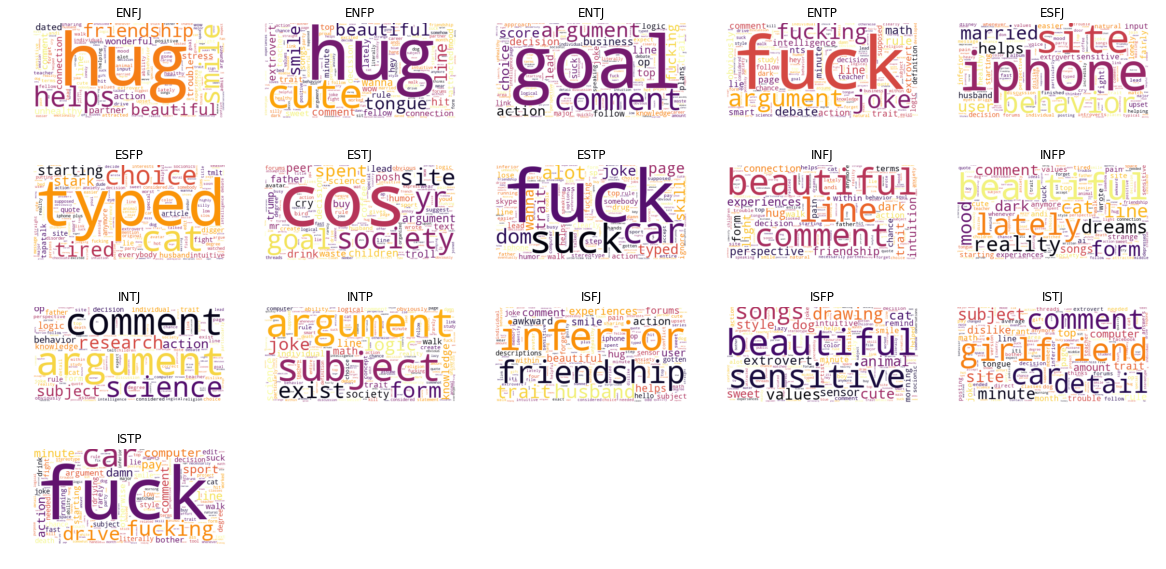

In [15]:
import matplotlib.pyplot as plt
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 10]

personality_Names =['ENFJ','ENFP','ENTJ','ENTP','ESFJ','ESFP','ESTJ','ESTP','INFJ','INFP','INTJ','INTP','ISFJ','ISFP','ISTJ','ISTP']

# create subplots for each personality type
for index, Personality_type in enumerate(data_stop.columns):
    wc.generate(' '.join(data_clean.posts[Personality_type]))
    
    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(personality_Names[index])

### 1.2.2 Findings

- ENFJ says the word hug a lot and talks about help a lot
- A lot of thses personalities use the words feelings, happy and thanks Let's dig into that later.

# 1.3 Number of  Words

### 1.3.1 Analysis

In [16]:
# Find the number of words each personality uses
# identify the non-zero items in the document-term matrix, meaning that the 
unique_list = []
for Personality_type in data_stop.columns:
    unique = data_stop[Personality_type].nonzero()[0].size
    unique_list.append(unique)
    
# Create a new DataFrame that contains this unique word count
words_data = pd.DataFrame(list(zip(personality_Names, unique_list)), columns=['Type','unique_words'])
sorted_words = words_data.sort_values(by='unique_words')
sorted_words

,Type,unique_words
6,ESTJ,1281
5,ESFP,1293
4,ESFJ,1298
7,ESTP,1457
12,ISFJ,1493
0,ENFJ,1498
2,ENTJ,1499
14,ISTJ,1499
1,ENFP,1500
3,ENTP,1500


In [17]:
# Find the total number of words that a personality type uses
total_list = []
for Personality_type in data_stop.columns:
    totals = sum(data_stop[Personality_type])
    total_list.append(totals)
    
# Add columns to the DataFrame
words_data['total_words'] = total_list

# Sort the DataFrame by total number of words used to see who talks alot
sorted_words_number = words_data.sort_values(by='total_words')
sorted_words_number

,Type,unique_words,total_words
6,ESTJ,1281,4057
5,ESFP,1293,4088
4,ESFJ,1298,4469
7,ESTP,1457,8578
12,ISFJ,1493,17123
0,ENFJ,1498,20022
14,ISTJ,1499,21621
2,ENTJ,1499,25121
13,ISFP,1500,25788
15,ISTP,1500,34569


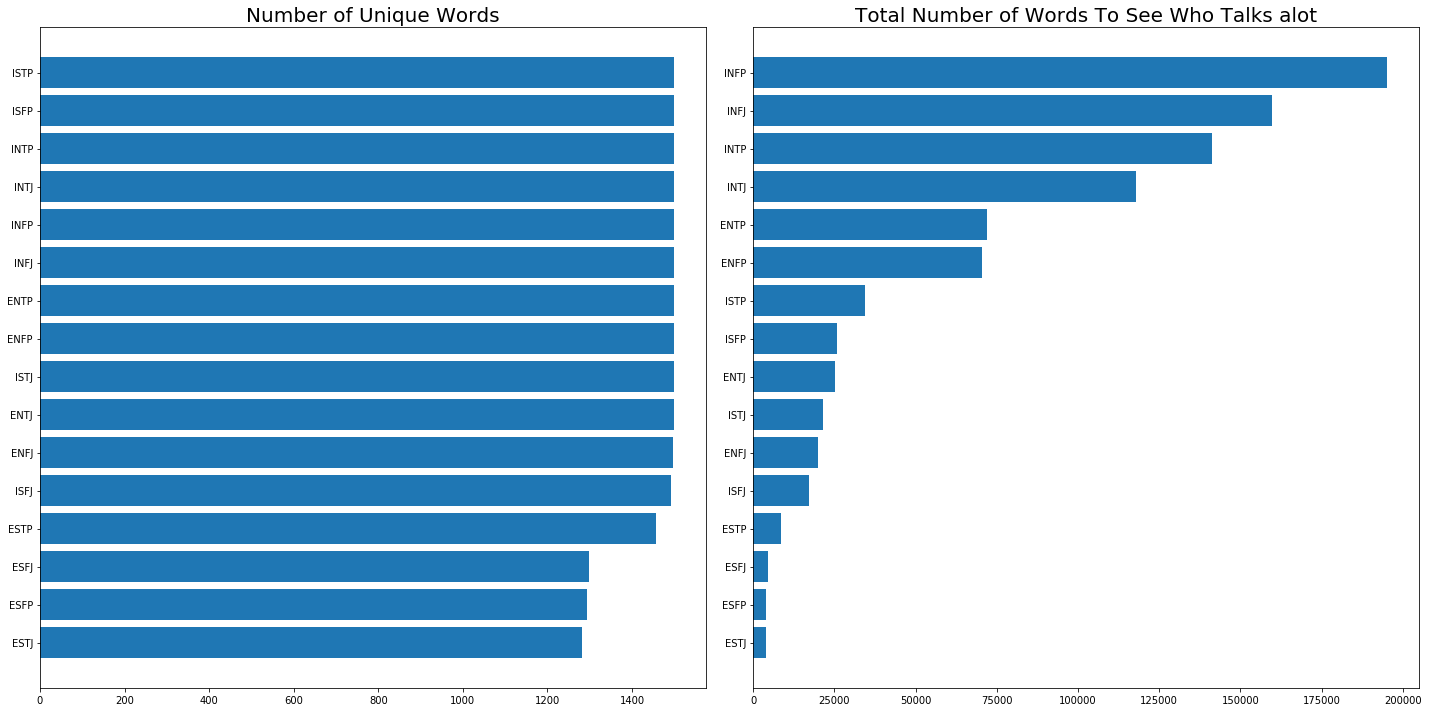

In [18]:
# Let's plot our findings
import numpy as np

y_position = np.arange(len(words_data))
plt.subplot(1, 2, 1)
plt.barh(y_position, sorted_words.unique_words, align = "center")
plt.yticks(y_position, sorted_words.Type)
plt.title('Number of Unique Words', fontsize = 20)

plt.subplot(1, 2, 2)
plt.barh(y_position, sorted_words_number.total_words, align = "center")
plt.yticks(y_position, sorted_words_number.Type)
plt.title('Total Number of Words To See Who Talks alot', fontsize = 20)

plt.tight_layout()

### 1.3.2 Findings

- Vocabulary 
  - Only ESTJ, ESFP, and ESFJ use less unique words compared to the rest of the personality types
  - All the personality types have a high vocabulary use.
<br>
- So Who talks a lot
  - INFP Type seems to enjoy using a lot more words than the rest, followed by INFJ, INTP and INTJ
  - ESTJ, ESFP, ESFJ and ESTP use the least amount of words while ISFJ, ENFJ, ISTJ, ENTJ, ISFP, ISTP, ENTP, ENFP are also consider relatively low.

# 1.4 Is There Narcissism

### 1.4.1 Analysis

In [19]:
# Revisiting narcissism. Let's take a look at the most common words
Counter(words).most_common()

[('im', 16),
 ('fe', 16),
 ('feelings', 16),
 ('happy', 16),
 ('thanks', 16),
 ('sorry', 16),
 ('care', 16),
 ('especially', 16),
 ('guy', 16),
 ('true', 16),
 ('experience', 16),
 ('almost', 16),
 ('hope', 16),
 ('wrong', 16),
 ('sounds', 16),
 ('ask', 16),
 ('close', 16),
 ('stuff', 16),
 ('however', 16),
 ('far', 16),
 ('strong', 16),
 ('let', 16),
 ('theyre', 16),
 ('put', 16),
 ('shes', 16),
 ('high', 16),
 ('told', 16),
 ('year', 16),
 ('wanted', 16),
 ('music', 16),
 ('comes', 16),
 ('away', 16),
 ('nothing', 16),
 ('found', 16),
 ('head', 16),
 ('forum', 16),
 ('start', 16),
 ('totally', 16),
 ('making', 16),
 ('either', 16),
 ('test', 16),
 ('without', 16),
 ('relate', 16),
 ('enjoy', 16),
 ('using', 16),
 ('rather', 16),
 ('wouldnt', 16),
 ('exactly', 16),
 ('reading', 16),
 ('big', 16),
 ('reason', 16),
 ('fact', 16),
 ('real', 16),
 ('completely', 16),
 ('problem', 16),
 ('girl', 16),
 ('remember', 16),
 ('social', 16),
 ('wish', 16),
 ('change', 16),
 ('welcome', 16),
 ('l

In [20]:
# Let's isolate just these words
data_me_words = data.transpose()[['im', 'alone', 'mine', 'whatever', 'self', 'wants', 'listen', 'takes', 'stupid', 'top' ]]
data_narcis_words = pd.concat([data_me_words.im, data_me_words.alone, data_me_words.mine, data_me_words.whatever, data_me_words.self, data_me_words.wants, data_me_words.listen, data_me_words.takes , data_me_words.stupid, data_me_words.top], axis=1)
data_narcis_words.columns = ['listen_words', 'im_words', 'alone_words', 'mine_words', 'whatever_words', 'self_words', 'wants_words', 'top_words', 'takes_words', 'stupid_words']
data_narcis_words

,listen_words,im_words,alone_words,mine_words,whatever_words,self_words,wants_words,top_words,takes_words,stupid_words
ENFJ,1660,79,57,54,49,46,40,54,38,25
ENFP,5712,289,226,184,202,130,171,138,144,119
ENTJ,1512,59,59,66,70,52,37,45,53,50
ENTP,4839,197,166,219,203,142,145,129,200,105
ESFJ,362,25,10,10,11,15,15,13,10,9
ESFP,337,17,10,14,8,10,4,4,14,6
ESTJ,287,14,11,17,11,10,7,9,12,7
ESTP,609,28,23,38,24,23,17,19,17,17
INFJ,11519,677,424,385,531,293,376,279,235,267
INFP,14899,902,542,544,635,371,508,357,339,322


In [21]:
data_narcis_words.sum()

listen_words      64739
im_words           3503
alone_words        2343
mine_words         2530
whatever_words     2581
self_words         1774
wants_words        2120
top_words          1722
takes_words        1960
stupid_words       1493
dtype: int64

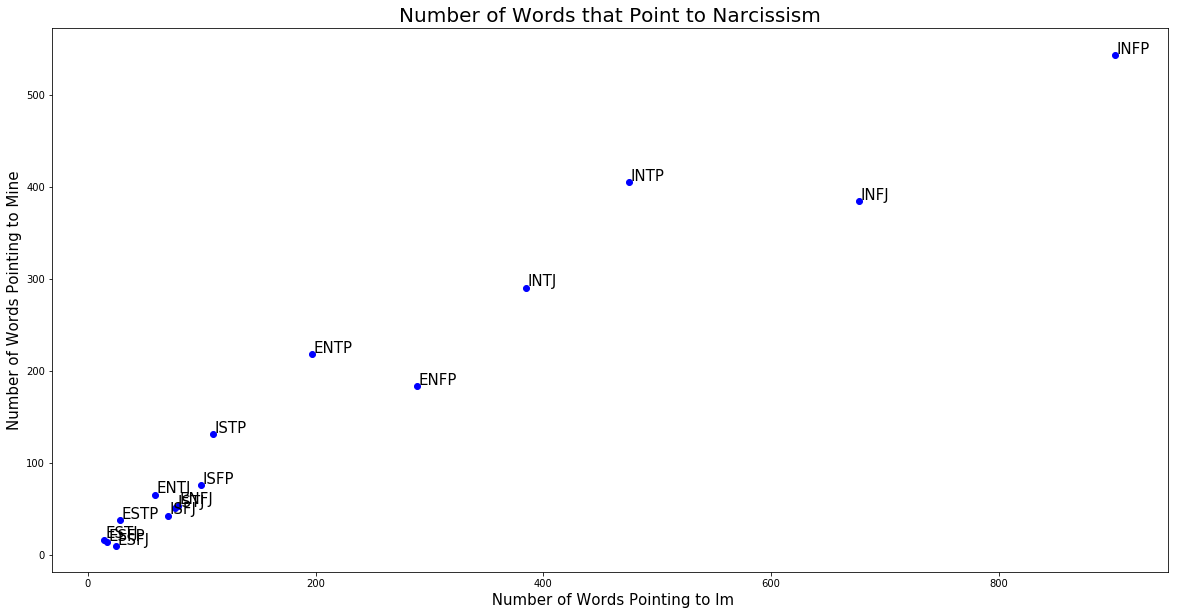

In [22]:
# Lets create a scatter plot of our findings
plt.rcParams['figure.figsize'] =  [20, 10]
for i, Personality_type in enumerate(data_narcis_words.index):
    x = data_narcis_words.im_words.loc[Personality_type]
    y = data_narcis_words.mine_words.loc[Personality_type]
    plt.scatter(x, y, color ='blue')
    plt.text(x+1.5, y+1.5, personality_Names
             [i], fontsize=15)
plt.title('Number of Words that Point to Narcissism', fontsize=20)
plt.xlabel(' Number of Words Pointing to Im', fontsize=15)
plt.ylabel('Number of Words Pointing to Mine', fontsize=15);
plt.show()

### 1.4.2 Findings

- I feel sorry, feel - this word points to the warmth of individuals and willness to talk about their feelimgs. we can see that INFP, INFJ, INTP, INTJ, ENTP and ENFP use FEEL a lot, can point to this personality types being a bit warm.
- I love owning you, I love controlling you. Again we see that INFP, INFJ, INTP, INTJ, ENTP and ENFP use love a lot. Can point to this personality types trying to sweet-talk and trying to pull others in.